In [48]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from unyt import boltzmann_constant_cgs, hydrogen_mass_cgs
parsec_in_cm = 3.086e18
gamma = 5./3.

In [87]:
tstart=30
tend=40

ts = []
for timestep in range(tstart, tend):
    timestep_str = f"{timestep:05d}"
    z_kpc, heatEdot_cgs = np.loadtxt("turbHeat_avg" + timestep_str + ".csv", unpack=True)
    z_kpc, coolEdot_cgs = np.loadtxt("coolEdot_avg" + timestep_str + ".csv", unpack=True)
    z_kpc, heatFlux_cgs = np.loadtxt("heatFlux_avg" + timestep_str + ".csv", unpack=True)
    z_kpc, massFlux_cgs = np.loadtxt("massFlux_avg" + timestep_str + ".csv", unpack=True)
    z_kpc, T_avg = np.loadtxt("T_avg" + timestep_str + ".csv", unpack=True)

    c_v = (1 /(gamma - 1.)) * boltzmann_constant_cgs
    convFlux = c_v * (heatFlux_cgs - massFlux_cgs * T_avg)
    ts.append((z_kpc, heatEdot_cgs, coolEdot_cgs, convFlux))

z_kpc = ts[0][0]
heatEdot_arr = np.zeros((len(ts[0][1]), len(ts)))
coolEdot_arr = np.zeros((len(ts[0][2]), len(ts)))
convFlux_arr = np.zeros((len(ts[0][3]), len(ts)))
for i in range(len(ts)):
    heatEdot_arr[:, i] = ts[i][1]
    coolEdot_arr[:, i] = ts[i][2]
    convFlux_arr[:, i] = ts[i][3]

heatEdot = np.mean(heatEdot_arr, axis=1)
coolEdot = np.mean(coolEdot_arr, axis=1)
convFlux = np.mean(convFlux_arr, axis=1)

z_kpc_cgs = z_kpc * (1.0e3 * parsec_in_cm)
z_kpc_diff = z_kpc[:-1] + 0.5 * np.diff(z_kpc)
divF = -scipy.signal.savgol_filter(convFlux, 3, 1, 1, delta=np.diff(z_kpc_cgs)[0])

In [88]:
L = 50. * (1e3 * parsec_in_cm) # 50 kpc
dv = 100. * 1e5 # 100 km/s
tc_over_tff = 0.5
Tconst = 3.0e7 # K

z = z_kpc_cgs
mu = 0.6 * hydrogen_mass_cgs # g
Lambda_cgs = 1.0e-22 # cgs
n0 = (3./2.)*(1./tc_over_tff)*(((boltzmann_constant_cgs*Tconst)**(3./2.))/np.sqrt(2.*mu))*(1./Lambda_cgs)
n = n0 / np.abs(z)
dn_dz = -np.sign(z) * n0 / z**2
Edot_MLT = -(1./12.)*L*dv*boltzmann_constant_cgs*(dn_dz/z - n/z**2)
Edot_MLT

unyt_array([7.14697675e-36, 7.87325853e-36, 8.70137694e-36,
            9.64982529e-36, 1.07412778e-35, 1.20037353e-35,
            1.34720439e-35, 1.51899302e-35, 1.72127572e-35,
            1.96113042e-35, 2.24770158e-35, 2.59293988e-35,
            3.01266052e-35, 3.52808342e-35, 4.16811684e-35,
            4.97281380e-35, 5.99872477e-35, 7.32740209e-35,
            9.07930750e-35, 1.14373126e-34, 1.46879271e-34,
            1.92968372e-34, 2.60545283e-34, 3.63745185e-34,
            5.29505213e-34, 8.13418341e-34, 1.34265973e-33,
            2.45141303e-33, 5.21014605e-33, 1.42966408e-32,
            6.61881517e-32, 1.78708010e-30, 1.78708010e-30,
            6.61881517e-32, 1.42966408e-32, 5.21014605e-33,
            2.45141303e-33, 1.34265973e-33, 8.13418341e-34,
            5.29505213e-34, 3.63745185e-34, 2.60545283e-34,
            1.92968372e-34, 1.46879271e-34, 1.14373126e-34,
            9.07930750e-35, 7.32740209e-35, 5.99872477e-35,
            4.97281380e-35, 4.16811684e-

/tmp/ipykernel_88334/3557049059.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


(1.2701441097903101, 100)

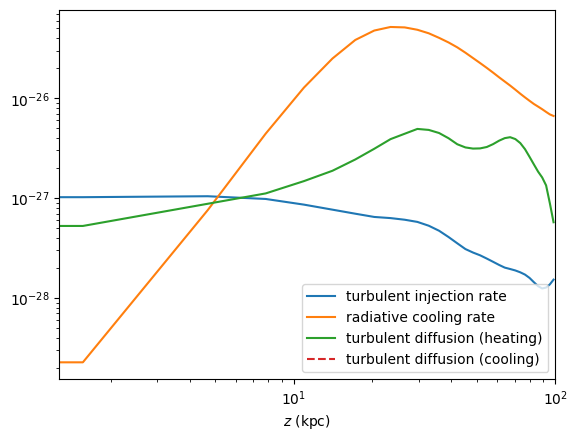

In [91]:
#plt.plot(z_kpc, Edot_MLT, label="turbulent diffusion (MLT)")
plt.plot(z_kpc, heatEdot, label="turbulent injection rate")
plt.plot(z_kpc, -coolEdot, label="radiative cooling rate")
plt.plot(z_kpc, divF, label="turbulent diffusion (heating)")
plt.plot(z_kpc, -divF, '--', label="turbulent diffusion (cooling)")
plt.legend(loc='lower right')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$z$ (kpc)")
plt.xlim(0, 100)

/tmp/ipykernel_88334/796984342.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


(0.01, 100.0)

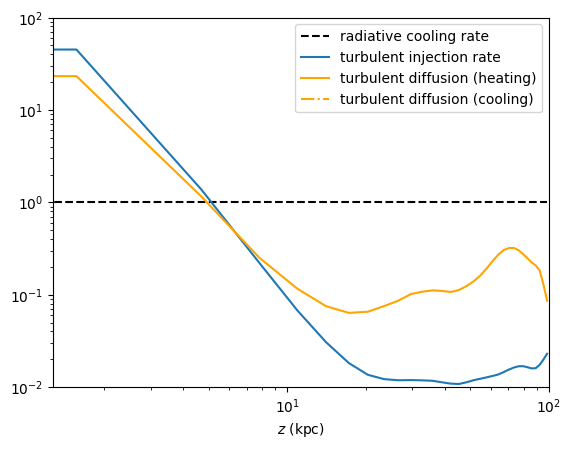

In [93]:
plt.plot(z_kpc, np.ones_like(coolEdot), '--', color='black', label="radiative cooling rate")
plt.plot(z_kpc, heatEdot/ (-coolEdot), label="turbulent injection rate")
plt.plot(z_kpc, divF / (-coolEdot), color='orange', label="turbulent diffusion (heating)")
plt.plot(z_kpc, -divF / (-coolEdot), '-.', color='orange', label="turbulent diffusion (cooling)")
plt.legend(loc='upper right')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$z$ (kpc)")
plt.xlim(0, 100)
plt.ylim(1e-2, 1e2)